<img src="https://www.politecnicos.com.br/img/075.jpg" alt="Grupo Turing" height="420" width="420">

# Análise de dados - Spotify

Por: Camilla de Oliveira Fonseca

Essa é uma análise do dataset "spotify.csv" proposta como mini-projeto de treinamento do Grupo Turing.

### Descrição do dataset
retirada [desse site](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/)

**Features:**

* **song_duration_ms:** _(int)_ The duration of the track in milliseconds.

* **key:** _(int)_ The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation
> E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

* **audio_mode:** _(int)_Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.
> Major is represented by 1 and minor is 0.

* **time_signature:** _(int)_ An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

* **acousticness:** _(float)_ A confidence measure from 0.0 to 1.0 of whether the track is acoustic.
> 1.0 represents high confidence the track is acoustic.

* **danceability:** _(float)_ Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
> A value of 0.0 is least danceable and 1.0 is most danceable.

* **energy:** _(float)_ Energy is a measure from *0.0 to 1.0* and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

* **instrumentalness:** _(float)_ Predicts whether a track contains no vocals.
> The closer the track is to 1.0, the greater the likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as it approaches 1.0.

* **loudness:** _(float)_ The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).
> Values typical range between -60 and 0 db.

* **speechiness:** _(float)_ Speechiness detects the presence of spoken words in a track.
> The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* **audio_valence:** _(float)_ A measure from *0.0 to 1.0* describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* **tempo:** _(float)_ The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* **song_popularity:** _(int)_ Song ratings of spotify audience.

* **liveness:** _(float)_ Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.
> A value above 0.8 provides strong likelihood that the track is live.

In [1]:
#Importando as bibliotecas necessarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


In [75]:
#Leitura do dataset
df = pd.read_csv("spotify.csv", index_col = 0) #index_col pq o dataset ja tem uma coluna de index

# Explorando e preparando os dados


## Problemas de tipos de dado e consistência

In [77]:
df.head(15)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520000000000001kg,0.496mol/L,0.682,2.94e-05,8.0,0.0589,-4.095,1,0.0294,167.06,4,0.474
1,In The End,66,216933,0.0103kg,0.542mol/L,0.853,0.0,3.0,0.108,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817kg,0.737mol/L,0.463,0.447,0.0,0.255,-7.8279999999999985,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.0264kg,0.451mol/L,0.97,0.00355,0.0,0.102,-4.938,1,0.107,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954kg,0.447mol/L,0.7659999999999999,0.0,10.0,0.113,-5.065,1,0.0313,172.011,4,0.574
5,Bring Me To Life,80,235893,0.00895kg,0.316mol/L,0.945,1.85e-06,4.0,0.396,-3.169,0,0.124,189.931,4,0.320
6,Last Resort,81,199893,0.000504kg,0.581mol/L,0.887,0.00111,4.0,0.268,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,76,213800,0.00148kg,0.613mol/L,0.953,0.000582,2.0,0.152,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,80,222586,0.00108kg,0.33mol/L,0.936,0.0,1.0,0.0926,-3.66,1,0.0917,148.112,4,0.234
9,Sex on Fire,81,203346,0.00172kg,0.542mol/L,0.905,0.0104,9.0,0.136,-5.653,1,0.054000000000000006,153.398,4,0.374


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18835 non-null object
song_duration_ms    18835 non-null object
acousticness        18835 non-null object
danceability        18835 non-null object
energy              18835 non-null object
instrumentalness    18835 non-null object
key                 18835 non-null float64
liveness            18835 non-null object
loudness            18835 non-null object
audio_mode          18835 non-null object
speechiness         18835 non-null object
tempo               18835 non-null object
time_signature      18835 non-null object
audio_valence       18834 non-null float64
dtypes: float64(2), object(13)
memory usage: 2.3+ MB


Vemos que a única feature que está armazenada no tipo de dado correto é *audio_valence*.

Além disso, os valores de *acousticness* e *danceability* estão salvos com "kg" e "mol/L" que, além de não fazerem sentido, precisam ser retirados para converter os dados em *float*.

Vemos também que há 1 dado nulo em _audio_valence_.

In [81]:
#Retirando kg e mol/L

df["acousticness"] = df["acousticness"].str.strip("kg")
df["danceability"] = df["danceability"].str.strip("mol/L")

#Retirando nulos
df.dropna(inplace = True)


Ao tentar converter os dados para *float*, encontrei alguns valores marcado com "nao_sei". Usar a função unique() seria uma forma de verificar se há valores inadequados como esse, porém a maioria das features tem uma quantidade muito grande de valores diferentes (uma vez que na verdade são dados contínuos) e isso não é possível.

Como o dataset é grande, provavelmente não haverá problemas em excluir as linhas com 'nao_sei'.

In [83]:
ftrs_str = ["song_name","song_popularity", "song_duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "audio_mode", "speechiness", "tempo", "time_signature"]

for ftr in ftrs_str:
    df = df[df[ftr] != 'nao_sei']
    df[ftr] = df[ftr].str.strip("nao_sei")

In [85]:
ftrs_unq = ["key", "audio_mode", "time_signature", "song_popularity"]

for ftr in ftrs_unq:
    print(df[ftr].unique())

[ 8.  3.  0. 10.  4.  2.  1.  9.  7. 11.  5.  6.]
['1' '0']
['4' '3' '1' '5' '2800000000' '0']
['73' '66' '76' '74' '56' '80' '81' '78' '63' '75' '69' '77' '71' '62'
 '79' '13' '28' '11' '65' '70' '60' '72' '57' '64' '61' '67' '94' '98'
 '59' '87' '85' '58' '92' '83' '44' '47' '54' '49' '52' '95' '45' '38'
 '46' '53' '39' '88' '68' '37' '43' '84' '40' '41' '10' '31' '48' '24'
 '29' '51' '4' '7' '50' '42' '30' '21' '55' '14' '33' '8' '16' '34' '26'
 '15' '19' '5' '3' '22' '36' '32' '35' '9' '82' '25' '86' '12' '18' '27'
 '17' '6' '20' '0' '90' '93' '91' '89' '99' '97' '96' '1' '2' '23' '100']


Para as features que são possíveis explorar com unique(), chama a atenção um valor de *time_signature* muito alto (280000000) e inconsistente.

In [87]:
df[df["time_signature"] == '2800000000']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
149,What Makes You Beautiful,69,198053,0.00761,0.7290000000000001,0.7709999999999999,0.0,4.0,0.087,-2.451,1,0.0725,125.011,2800000000,0.873


Pesquisando na internet, vemos que o tempo de "What Makes You Beautiful" é 4, assim podemos arrumar.

In [89]:
df.loc[149,"time_signature"] = '4'

df.loc[149]

song_name           What Makes You Beautiful
song_popularity                           69
song_duration_ms                      198053
acousticness                         0.00761
danceability              0.7290000000000001
energy                    0.7709999999999999
instrumentalness                         0.0
key                                        4
liveness                               0.087
loudness                              -2.451
audio_mode                                 1
speechiness                           0.0725
tempo                                125.011
time_signature                             4
audio_valence                          0.873
Name: 149, dtype: object

Fiquei um tanto curiosa também com o valor 0 para essa feature, pois não sabia se fazia sentido.

In [91]:
df[df["time_signature"] == '0']

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
7119,Gina Rodriguez - Latinos Trending Intr,0,12000,0.7,0.0,0.493,0.0,7.0,0.457,-6.102,1,0.0,0.0,0,0.000
11171,Aur,50,102536,0.0774,0.0,0.56,0.963,11.0,0.589,-9.866,1,0.0,0.0,0,0.000
18120,Imma B,61,257560,0.184,0.619,0.539,0.0,0.0,0.28800000000000003,-6.9,1,0.387,145.618,0,0.424


Pesquisando na internet, vi que a notação "0" pode ser usada para músicas com compassos livres ou irregulares, que parece ser o caso das músicas acima.

Agora podemos converter os dados para seus tipos corretos.

As features *audio_mode* e *time_signature* são categóricas e, apesar de constarem como *int* na descrição do dataset, preferi convertê-las para *category*.

In [93]:
ftrs_float = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo"]

ftrs_int = ["song_popularity", "song_duration_ms", "key"]

ftrs_cat = ["audio_mode", "time_signature"]

#Corvertendo para float
for ftr in ftrs_float:
    df[ftr] = df[ftr].astype('float')

#Convertendo para int
for ftr in ftrs_int:
    df[ftr] = df[ftr].astype(np.int64)
    # quando tentei .astype('int') deu erro com a seguinte msg: Python int too large to convert to C long

#Convertendo para categorico
for ftr in ftrs_cat:
    df[ftr] = df[ftr].astype('category')

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18823 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18823 non-null object
song_popularity     18823 non-null int64
song_duration_ms    18823 non-null int64
acousticness        18823 non-null float64
danceability        18823 non-null float64
energy              18823 non-null float64
instrumentalness    18823 non-null float64
key                 18823 non-null int64
liveness            18823 non-null float64
loudness            18823 non-null float64
audio_mode          18823 non-null category
speechiness         18823 non-null float64
tempo               18823 non-null float64
time_signature      18823 non-null category
audio_valence       18823 non-null float64
dtypes: category(2), float64(9), int64(3), object(1)
memory usage: 2.7+ MB


In [97]:
df.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dream,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind M,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [99]:
df[ftrs_cat].describe()

,audio_mode,time_signature
count,18823,18823
unique,2,5
top,1,4
freq,11825,17744


Vemos que os valores de *time_signatue* estão **bem** concentrados em 4, a frequência ultrapassa 90%.

In [101]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
song_popularity,18823.0,5.299033e+01,2.190882e+01,0.000000e+00,40.0000,56.000000,69.00000,100.000
song_duration_ms,18823.0,-9.841578e+08,1.350534e+11,-1.852891e+13,184339.5000,211306.000000,242844.00000,1799346.000
acousticness,18823.0,2.585292e-01,2.887133e-01,1.020000e-06,0.0241,0.132000,0.42400,0.996
danceability,18823.0,6.334021e-01,1.566931e-01,0.000000e+00,0.5330,0.645000,0.74800,0.987
energy,18823.0,6.450035e-01,2.140746e-01,1.070000e-03,0.5100,0.674000,0.81500,0.999
instrumentalness,18823.0,7.800799e-02,2.215674e-01,0.000000e+00,0.0000,0.000011,0.00257,0.997
key,18823.0,5.288902e+00,3.614212e+00,0.000000e+00,2.0000,5.000000,8.00000,11.000
liveness,18823.0,1.796629e-01,1.440198e-01,1.090000e-02,0.0929,0.122000,0.22100,0.986
loudness,18823.0,-7.447085e+00,3.826882e+00,-3.876800e+01,-9.0440,-6.555000,-4.90900,1.585
speechiness,18823.0,1.020912e-01,1.043930e-01,0.000000e+00,0.0378,0.055500,0.11900,0.941


Observamos problemas em _song_duration_ms_, uma vez que a duração de uma música não pode ser negativa, e em _loudness_, já que seu máximo é 0.

In [103]:
df[df["song_duration_ms"] <= 0]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
62,White B,59,-18528908788662,0.0983,0.83,0.497,0.0,1,0.0906,-6.94,1,0.052,127.965,4,0.634


In [105]:
df[df["loudness"] > 0]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
2503,We Are Your Friends - Radio Edit,57,164960,0.01020,0.646,0.977,0.769000,9,0.201,1.585,0,0.1670,123.016,4,0.6060
2819,Search and Destroy - Iggy Pop Mix,55,208133,0.00353,0.235,0.977,0.006040,6,0.172,0.878,1,0.1070,152.952,4,0.2410
6219,Polar,55,236240,0.00679,0.795,0.994,0.904000,8,0.057,0.525,0,0.0483,126.023,4,0.8650
7980,Gladiator - Instrumental,14,198000,0.01070,0.780,0.972,0.029600,6,0.100,0.119,0,0.2530,137.056,4,0.9580
8950,Wake Up (RIOT VIP),52,292915,0.02510,0.341,0.995,0.000070,7,0.713,0.052,1,0.6260,160.311,4,0.0801
13006,We Are Your Friends - Justice Vs Sim,58,262773,0.01040,0.615,0.970,0.384000,9,0.178,1.342,0,0.1190,122.993,4,0.5070
15623,Long Story Short - Bodybangers Remix Edit,33,206718,0.01610,0.762,0.977,0.000011,5,0.535,0.198,0,0.0934,128.012,4,0.6160


Como são poucos e seria complicado corrigir esses valores, optei por retirá-los.

In [107]:
df = df[(df["song_duration_ms"] > 0) & (df["loudness"] <= 0)]

## Dados duplicados

In [109]:
antes = len(df)
print(antes)

18815


In [111]:
# Retirando duplicados completos
df.drop_duplicates(inplace = True)

# Analisando nomes duplicados
duplicates = df.duplicated(subset = "song_name", keep = False)
df[duplicates].sort_values(by = "song_name")

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
5614,tears left to cry,92,205920,0.040000,0.699,0.713,0.000003,9,0.2940,-5.507,0,0.0594,121.993,4,0.354
4644,tears left to cry,74,205946,0.037500,0.703,0.696,0.000006,0,0.2740,-5.482,1,0.0529,121.969,4,0.366
2229,(Don't Fear) The Reaper,19,308440,0.001250,0.368,0.928,0.001110,9,0.3010,-8.369,0,0.0593,141.175,4,0.532
459,(Don't Fear) The Reaper,76,308120,0.002900,0.333,0.927,0.000211,9,0.2970,-8.550,0,0.0733,141.470,4,0.382
660,(I Just) Died In Your Arm,69,280400,0.015800,0.625,0.726,0.000169,11,0.0625,-11.402,0,0.0444,124.945,4,0.507
2306,(I Just) Died In Your Arm,72,278626,0.011900,0.632,0.727,0.000076,11,0.0678,-11.209,0,0.0438,124.919,4,0.499
807,(I've Had) The Time of My Lif,21,289680,0.047600,0.697,0.665,0.006650,6,0.0796,-12.907,0,0.0412,108.535,4,0.485
2324,(I've Had) The Time of My Lif,63,289066,0.087400,0.700,0.781,0.003420,6,0.0590,-8.255,0,0.0507,108.695,4,0.385
16924,(No One Knows Me) Like the P,19,218160,0.976000,0.619,0.198,0.001910,10,0.1040,-13.808,1,0.0344,128.998,4,0.179
2621,(No One Knows Me) Like the P,67,218160,0.976000,0.621,0.199,0.001860,10,0.1070,-13.788,1,0.0344,128.905,4,0.178


In [113]:
depois1 = len(df)
print(antes - depois1)

3903


A questão dos duplicados se tratando de música é um tanto singular. Vemos que há várias linhas com mesmo nome, porém demais valores diferentes. Isso provavelmente se deve ao fato de haver músicas distintas com o mesmo nome ou versões diferentes da mesma música. No entanto, seria difícil músicas ou versão diferentes terem todos os valores exatamente iguais, por isso exclui duplicados completos com *.drop_duplicates()*. Por enquanto, 3903 linhas duplicadas foram retiradas.

Pode haver também duplicados não excluidos com *.drop_duplicates()* devido a pequenas variações nos floats ou na duração, já que ela está em milissegundos.

In [115]:
colunas = ["song_name", "song_popularity", "key", "audio_mode", "time_signature"]
duplicates = df.duplicated(subset = colunas, keep=False)
df[duplicates].sort_values(by = "song_name")

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
11960,Always Remember Us This Way,79,210200,0.299000,0.553,0.502,0.000000,0,0.7640,-5.972,1,0.0409,129.976,4,0.296
5910,Always Remember Us This Way,79,210200,0.299000,0.541,0.522,0.000000,0,0.7750,-5.997,1,0.0440,129.853,4,0.255
15407,Amig,45,279946,0.747000,0.529,0.648,0.000000,11,0.1580,-7.895,0,0.0399,159.036,4,0.808
4194,Amig,45,205133,0.187000,0.582,0.668,0.000000,11,0.1140,-8.585,0,0.0433,145.271,4,0.864
16819,Believer,23,204346,0.051200,0.772,0.780,0.000000,10,0.1190,-4.288,0,0.1080,124.988,4,0.719
11342,Believer,23,203782,0.041700,0.772,0.775,0.000000,10,0.2260,-4.388,0,0.1120,124.978,4,0.748
7873,Bod,55,192999,0.301000,0.619,0.843,0.000000,2,0.0538,-4.748,0,0.1250,91.990,4,0.588
18681,Bod,55,192999,0.309000,0.620,0.841,0.000000,2,0.0538,-4.745,0,0.1290,91.996,4,0.647
1864,Crazy in Lov,65,249106,0.000553,0.646,0.720,0.000008,7,0.0556,-7.063,1,0.2060,99.259,4,0.640
1383,Crazy in Lov,65,227500,0.868000,0.606,0.326,0.000000,7,0.1200,-9.401,1,0.1190,78.906,4,0.489


Para tratar esses dados, decidi usar a média dos valores discrepantes.

In [117]:
#completando a lista de floats
ftrs_float.append("audio_valence")

#tirar a media dos discrepantes
summaries = {'song_duration_ms': 'mean'}
for ftr in ftrs_float:
    summaries[ftr] = "mean"

df = df.groupby(colunas).agg(summaries).reset_index()

#Verificar se deu tudo certo 
duplicates = df.duplicated(subset = colunas, keep=False)
df[duplicates].sort_values(by = "song_name")

,song_name,song_popularity,key,audio_mode,time_signature,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence


In [119]:
depois2 = len(df)
print(antes - depois2)

3914


Foram retirados ao todo 3914 duplicados.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14901 entries, 0 to 14900
Data columns (total 15 columns):
song_name           14901 non-null object
song_popularity     14901 non-null int64
key                 14901 non-null int64
audio_mode          14901 non-null category
time_signature      14901 non-null category
song_duration_ms    14901 non-null float64
acousticness        14901 non-null float64
danceability        14901 non-null float64
energy              14901 non-null float64
instrumentalness    14901 non-null float64
liveness            14901 non-null float64
loudness            14901 non-null float64
speechiness         14901 non-null float64
tempo               14901 non-null float64
audio_valence       14901 non-null float64
dtypes: category(2), float64(10), int64(2), object(1)
memory usage: 1.5+ MB


## Novas colunas

A duração das músicas estava no dataset original em ms, mas são valores muito grandes que complicam a análise. Por isso decidi criar novas colunas.

In [124]:
df['song_duration_s'] = df['song_duration_ms']/1000

df['song_duration_min'] = df['song_duration_s']/60

In [125]:
df[['song_duration_ms', 'song_duration_s', 'song_duration_min']].describe().T

,count,mean,std,min,25%,50%,75%,max
song_duration_ms,14901.0,218957.232199,62359.429792,12000.0,183931.000000,211851.00000,244720.000000,1.799346e+06
song_duration_s,14901.0,218.957232,62.359430,12.0,183.931000,211.85100,244.720000,1.799346e+03
song_duration_min,14901.0,3.649287,1.039324,0.2,3.065517,3.53085,4.078667,2.998910e+01


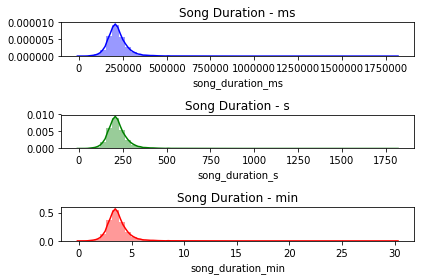

In [133]:
# em ms
plt.subplot(3,1,1)
sns.distplot(df['song_duration_ms'], color='b')
plt.title('Song Duration - ms')

# em s
plt.subplot(3,1,2)
sns.distplot(df['song_duration_s'], color='g')
plt.title('Song Duration - s')

# em min
plt.subplot(3,1,3)
sns.distplot(df['song_duration_min'], color='r')
plt.title('Song Duration - min')

# pra melhorar o espacamento dos graficos
plt.tight_layout()
plt.show()

In [140]:
# Quantidade relativa de musicas que ultrapassam 10 min
len(df[df['song_duration_min'] > 10]) / len(df['song_duration_min'])

0.0012079726192872962

Vemos que é bem mais fácil interpretar o gráfico em minutos.

Os dados estão bem concentrados em torno de 4 minutos. Apesar de haver observações com mais de 20, a porcentagem que ultrapassa 10 é por volta de 0,1%. Isso indica que talvez seja interessante fazer um recorte do dataset.

# Plotando

In [ ]:
ftrs_num = ['song_duration_min', "acousticness", "danceability", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "song_popularity", "key", "audio_valence"]

plt.figure(figsize=(18,10))
sns.pairplot(df[ftrs_num])
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap = "coolwarm")
plt.show()